In [1]:
import pystablemotifs as sm
import pyboolnet
import pystablemotifs.export as ex
import networkx as nx

INFO NumExpr defaulting to 8 threads.


In [2]:
model_name = 'HH_EMT'
with open(model_name + '.booleannet','r') as f:
    rules = f.read()
print(rules)

SNAI1 *= (not miR_34 and not SNAI1) or GLI
miR_34 *= not SNAI1 and not ZEB1
ZEB1 *= (SNAI1 and SNAI2 and TWIST1 and LEF1 and B_catenin_TCF4 and GLI) or not miR_200
miR_200 *= not (ZEB1 and SNAI1)

SNAI2 *= TWIST1 or B_catenin_nuc or GLI
LEF1 *= ((B_catenin_nuc and (not miR_34))) or NFKB
TWIST1 *= SNAI1 and (not miR_34 or NFKB)

B_catenin_nuc *= ((not miR_34) or (not miR_200)) and (not AJ)
B_catenin_TCF4 *= B_catenin_nuc and SNAI1 and SNAI2

E_cadherin *= not (ZEB1 and SNAI1 and SNAI2 and TWIST1)
TGFb_secr *= (B_catenin_TCF4 or GLI) and (not miR_200) 

GLI*= not SUFU
SHH*= (GLI or NFKB) and not HHIP
HHIP*= GLI
Patched*= not SHH
SMO*= not Patched
SUFU *= not SMO
NFKB*= Damage

AJ *= E_cadherin and neighbor

Rac1 *= not miR_34 or not miR_200
PAK1 *= Rac1
Migration *= PAK1 and not E_cadherin

Damage *= Damage 
neighbor *= neighbor



In [3]:
primes = sm.format.create_primes(rules)
max_simulate_size=20
ar = sm.AttractorRepertoire.from_primes(primes, max_simulate_size=max_simulate_size)
df=ex.attractor_dataframe(ar)

In [4]:
df

,AJ,B_catenin_TCF4,B_catenin_nuc,Damage,E_cadherin,GLI,HHIP,LEF1,Migration,NFKB,...,SMO,SNAI1,SNAI2,SUFU,TGFb_secr,TWIST1,ZEB1,miR_200,miR_34,neighbor
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0,X,X,1,X,X,X,1,X,1,...,X,X,X,X,X,X,X,X,X,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
3,1,0,0,1,1,X,X,1,0,1,...,X,X,X,X,0,X,0,1,X,1


In [10]:
ar.summary()

There are 4 attractors.
{'AJ': 0, 'B_catenin_TCF4': 0, 'B_catenin_nuc': 0, 'Damage': 0, 'E_cadherin': 1, 'GLI': 0, 'HHIP': 0, 'LEF1': 0, 'Migration': 0, 'NFKB': 0, 'PAK1': 0, 'Patched': 1, 'Rac1': 0, 'SHH': 0, 'SMO': 0, 'SNAI1': 0, 'SNAI2': 0, 'SUFU': 1, 'TGFb_secr': 0, 'TWIST1': 0, 'ZEB1': 0, 'miR_200': 1, 'miR_34': 1, 'neighbor': 0}

{'AJ': 0, 'B_catenin_TCF4': 'X', 'B_catenin_nuc': 'X', 'Damage': 1, 'E_cadherin': 'X', 'GLI': 'X', 'HHIP': 'X', 'LEF1': 1, 'Migration': 'X', 'NFKB': 1, 'PAK1': 'X', 'Patched': 'X', 'Rac1': 'X', 'SHH': 'X', 'SMO': 'X', 'SNAI1': 'X', 'SNAI2': 'X', 'SUFU': 'X', 'TGFb_secr': 'X', 'TWIST1': 'X', 'ZEB1': 'X', 'miR_200': 'X', 'miR_34': 'X', 'neighbor': 0}

{'AJ': 1, 'B_catenin_TCF4': 0, 'B_catenin_nuc': 0, 'Damage': 0, 'E_cadherin': 1, 'GLI': 0, 'HHIP': 0, 'LEF1': 0, 'Migration': 0, 'NFKB': 0, 'PAK1': 0, 'Patched': 1, 'Rac1': 0, 'SHH': 0, 'SMO': 0, 'SNAI1': 0, 'SNAI2': 0, 'SUFU': 1, 'TGFb_secr': 0, 'TWIST1': 0, 'ZEB1': 0, 'miR_200': 1, 'miR_34': 1, 'neighbor': 

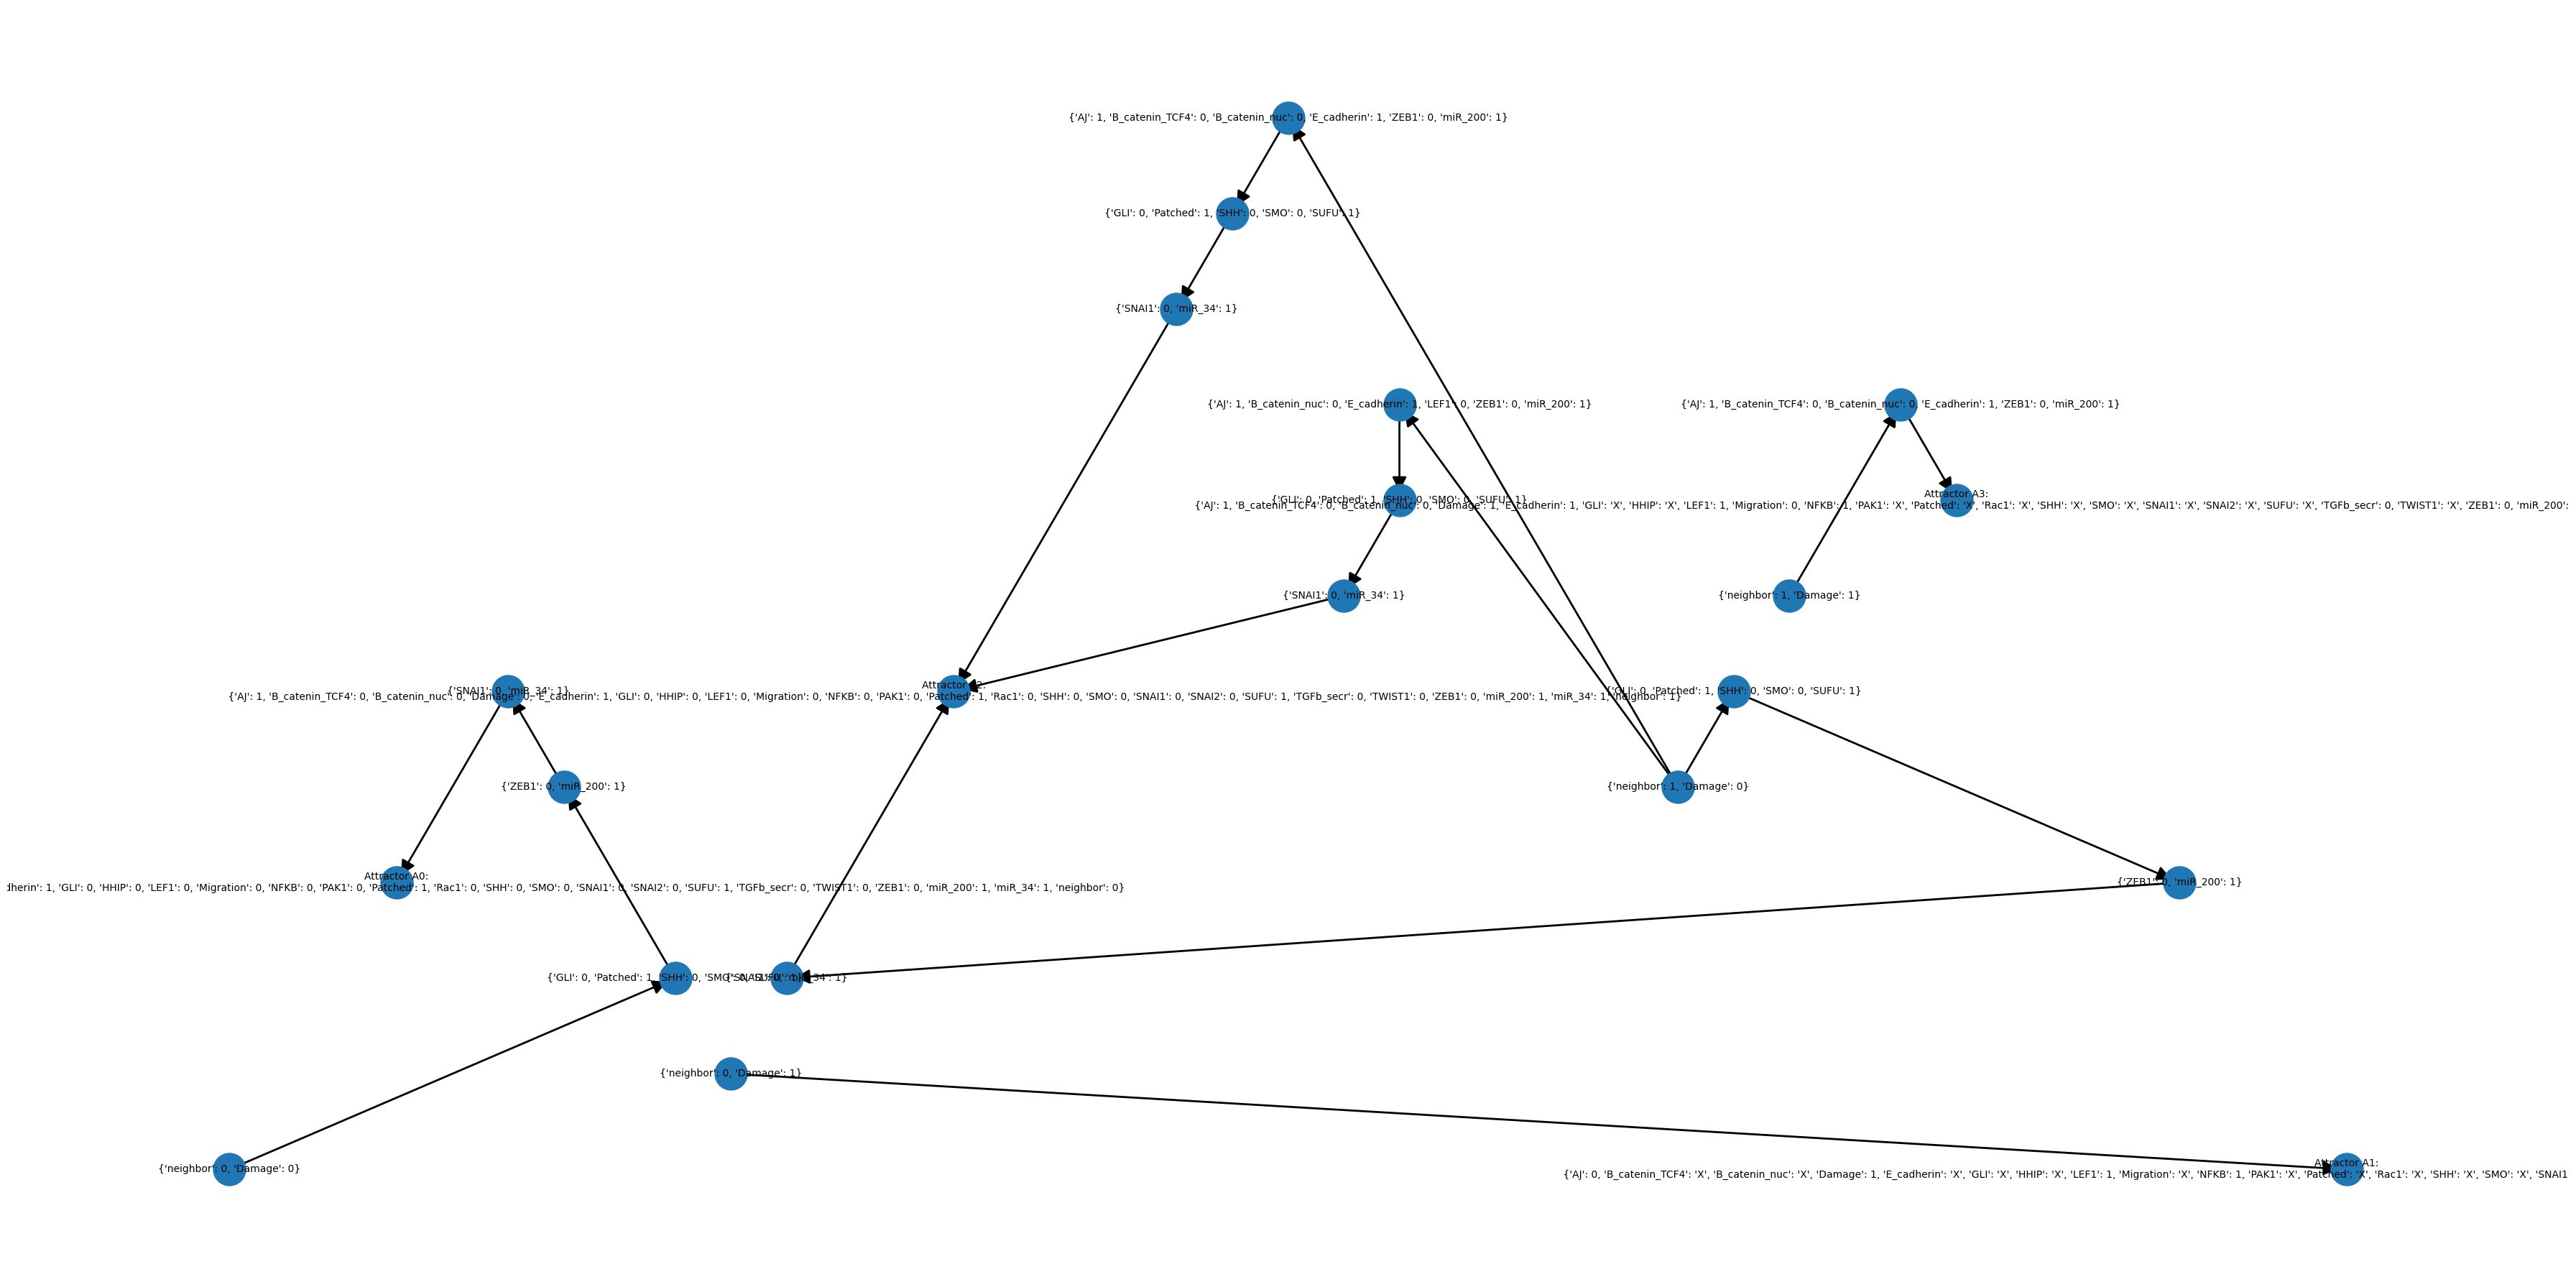

In [13]:
GM=ex.networkx_succession_diagram_motif_based(ar,include_attractors_in_diagram=True)
ex.plot_nx_succession_diagram(GM,draw_edge_labels=True,
                              nx_node_label_kwargs={'font_size':10},
                              nx_edge_label_kwargs={'font_size':12,'rotate':False})

In [14]:
ex.save_to_graphml(GM,model_name='succ_diagram_stable_motifs')

In [15]:
target={'miR_34': 0,
'miR_200': 1,
'Ecadherin_mRNA': 1,
'ZEB1': 0,
'SNAI1': 0}

In [17]:
interventions = sm.drivers.knock_to_partial_state(target,primes,max_drivers=4)
print("Sets found:")
for x in interventions: 
    print({k:v for k,v in sorted(x.items())})

Sets found:
{'Ecadherin_mRNA': 1, 'SNAI1': 0, 'miR_34': 0}
